# 영국왕 수명

In [ ]:
#   시계열 데이터는 섞으면 안됨(특정 시점 기준 전후로 학습용과 테스트용으로 사용)

# arima 모형
# RNN 모형
# 회귀분석 모형 - LinearRegression, DecisionTreeRegressor, SVR

#   n차 차분
#   t-3     t-2     t-1
#   10      20      30

In [1]:
#영국왕들의 수명 데이터
import pandas as pd
df = pd.read_csv('c:/workspace3/data/kings.dat',header=None,names=['age'])
df.head()

,age
0,60
1,43
2,67
3,50
4,56


<Axes: >

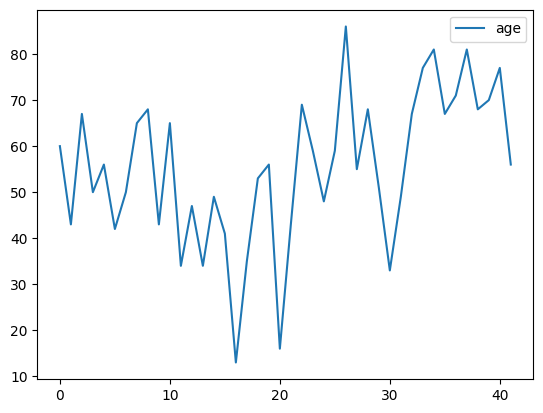

In [2]:
df.plot()

In [3]:
#안정적인 시계열 : 시간의 추이와 관계없이 평균,분산이 일정한 경우
#불안정적인 시계열 : 차분을 통해 시계열을 안정적으로 변환한 후 분석 진행
#1025 1030 1015 1030
# 1030-1025=5
# 1015-1030=-15
# 데이터.diff(periods=n) n 차분
# 정상성을 만족시키기 위해 차분을 사용함

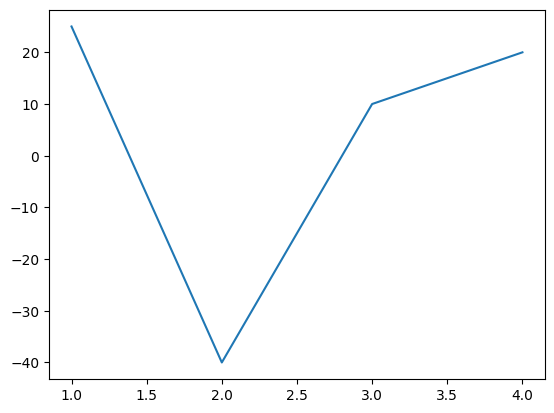

In [4]:
import matplotlib.pyplot as plt

a=pd.Series([1025,1050,1010,1020,1040])
b=a.diff(periods=1).iloc[1:]
#         차분차수

plt.plot(b)

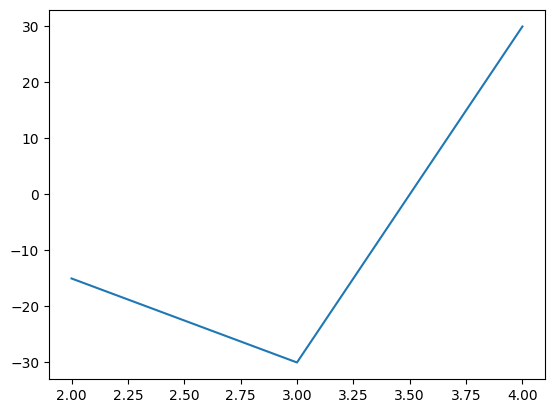

In [5]:
import matplotlib.pyplot as plt

a=pd.Series([1025,1050,1010,1020,1040])
b_1=a.diff(periods=2).iloc[2:]

plt.plot(b_1)

In [6]:
#정상성(stationary) : 모든 시점에 평균이 일정한 특성
#  시간에 따라 확률적인 성분이 변하지 않는다는 가정, 정상성이 없으면 비시계열 자료로 분류됨
#차분(difference) : 현시점 자료에서 전시점 자료를 빼는 것
#평균이 일정하지 않은 시계열은 차분(difference)을 통해 정상화

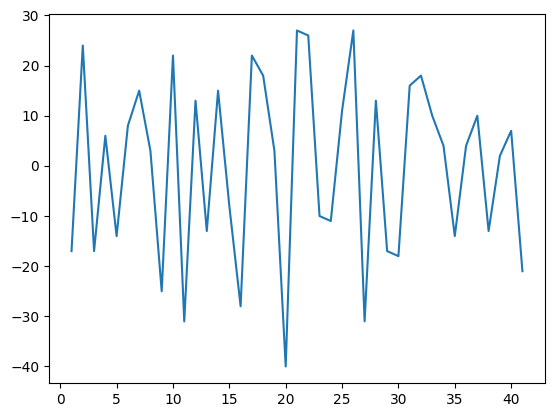

In [7]:
#1차 차분을 통해 데이터를 정상화하는 과정

diff1=df['age'].diff(periods=1).iloc[1:]
diff1.plot()

plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1=np.log(df['age']).diff(periods=1).iloc[1:]
#        로그                  1차차분

result = adfuller(diff1)
#         안정적인 시계열 데이터 여부

print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함(안정적인 시계열 자료임)

#   가설
#           귀무가설 H0 : 불안정한 시계열 데이터
#           대립가설 H1 : 내가 주장하고 싶은 가설
#                        안정적인 시계열 데이터

#   p-value 0.05 작아야, 95% 신뢰수준

(-7.44685642961395, 5.807660899733685e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.204960096784966)
ADF Statistic: -7.446856
p-value: 0.000000


In [9]:
#가장 적절한 arima 모델을 추천해주는 함수
# arima: AR모형과 MA모형을 결합한 함수
# arima(p,d,q)      
# ar(p) 모형의 p,  
#   자기상관모형(Autocorrelation) : 이전의 값이 이후의 값에 영향을 미치는 모형
#   ar(1) : 직전 데이터가 다음 데이터에 영향을 줄 경우
#   ex) 용수철을 잡아 당기면 원래 길이로 돌아가려는 경향
# ma(q) 모형의 q
#   이동평균(Moving Average) : 시간이 지날수록 평균값이 지속적으로 증가하거나 감소하는 경향
#   ma(1) 직전 데이터가 다음 데이터에 영향을 주는 경우
# d : 차분차수

In [10]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
model = auto_arima(df)
model
#가장 적절한 모형은 arima(0,1,1)
# // p : 정상성 / d : 차분차수 / q : 이동평균 //
#    0           1              1

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [11]:
#학습용,검증용 구분
train = df[:30] # 학습용
test = df[30:]  # 검증용

print(len(df['age']))
print(df['age'].values)

42
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]


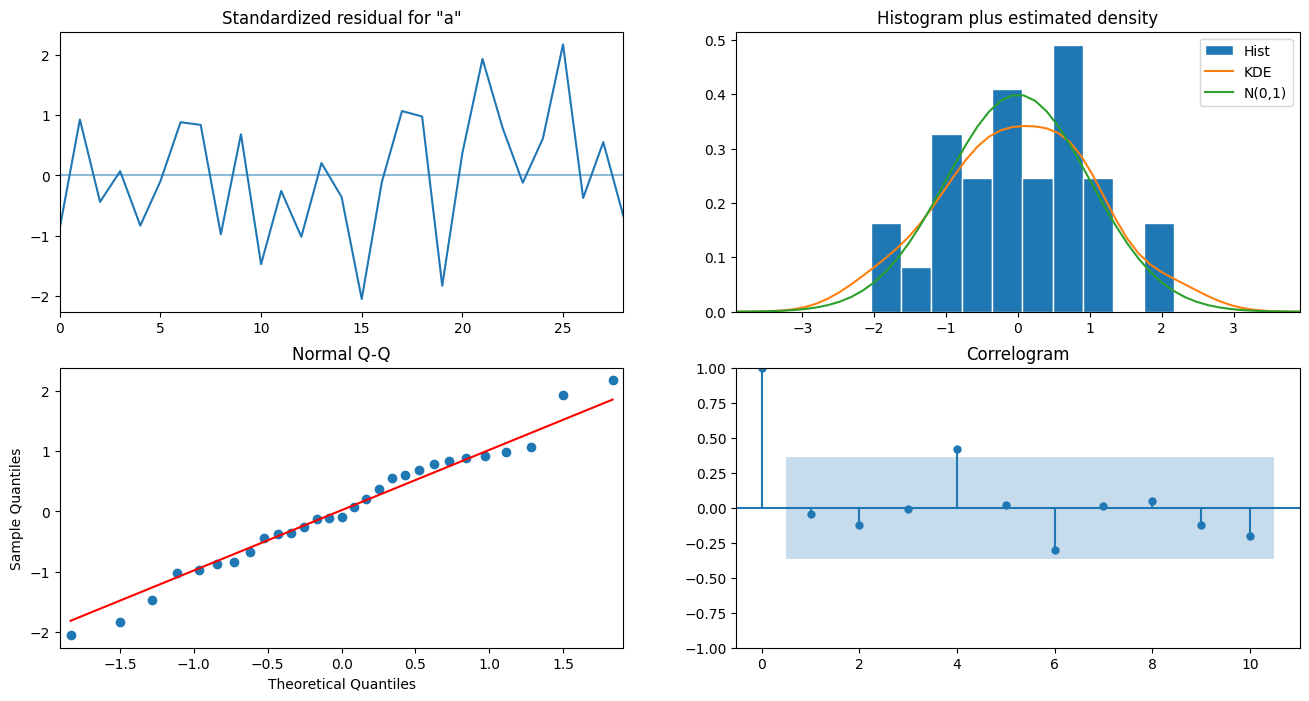

In [12]:
#arima(1,2,1)을 수행할 경우  order=c(1,2,1)로 모형을 생성함
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0,1,1)).fit()
#       시계열 모형
model.plot_diagnostics(figsize=(16, 8))

plt.show()
#Standardized residual: 잔차를 시계열로 그린 그래프
#Histogram plus estimated density와 Normal Q-Q : 잔차가 정규성을 만족하는가
#Normal Q-Q plot 데이터의 정규성 가정에 대한 검토, 모집단이 정규성을 따른다면 직선의 형태로 그려짐
#안정적인 시계열 자료이고 정규분포임

In [13]:
predictions = model.predict(start=1, end=len(test), dynamic=False)
predictions.index=len(train)+(predictions.index-1)
predictions

30    59.989111
31    51.115646
32    57.169734
33    54.861844
34    55.195907
35    51.513504
36    51.102642
37    54.818956
38    58.314968
39    54.271040
40    57.097169
41    51.021130
Name: predicted_mean, dtype: float64

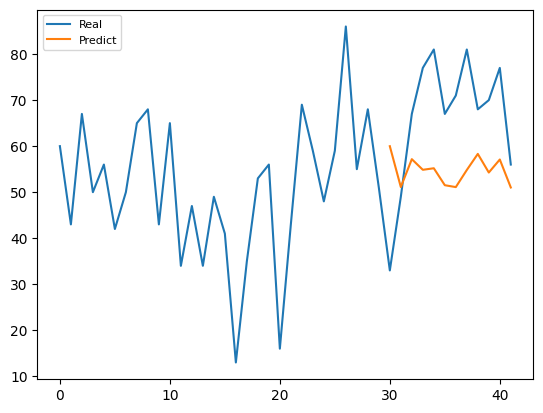

In [14]:
plt.plot(df,label='Real')
plt.plot(predictions,label='Predict')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error  

mse = mean_squared_error(test, predictions)  
#                       실제    모형출력

rmse = np.sqrt(mse)  # 평균제곱근오차
rmse

18.413687583787553